In [1]:
import numpy as np
import arepo
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter
from tqdm import tqdm
import matplotlib as mpl
from scipy.stats import binned_statistic_2d
from numba import njit
import h5py as h5
import os

In [2]:
basepath = '/n/holylfs05/LABS/hernquist_lab/Users/abeane/GSEgas/'

In [51]:
def get_disk_prop(name):

    Time = []
    MassIn10kpc = []
    for i in [0, 1, 2, 3]:
        MassIn10kpc.append([])
    
    COM_fpath = basepath + 'anlys/COM/COM_' + name + '.npy'
    COM_file = np.load(COM_fpath, allow_pickle=True).item()

    for snap in tqdm(np.arange(0, 800, 10)):
        fname = basepath + 'anlys/MC/'+name+'/MC_Prop_'+str(snap).zfill(3)+'.h5'
        if not os.path.isfile(fname):
            continue
        
        f = h5.File(fname, mode='r')
    
        Time.append(f['Header'].attrs['Time'])
    
        pos = f['PartType5/Coordinates'][:]
        mass = f['PartType5/Masses'][:]
        memb = f['PartType5/Membership'][:]
        ptype = f['PartType5/PartType'][:]
        massmetal = f['PartType5/GFM_Metallicity'][:] * mass
        
        # COMrel_GSE = COM_file['MW_COM'][snap] = COM_file['GSE_COM'][snap]
        # relpos = pos - COMrel_GSE
        # r = np.linalg.norm(relpos, axis=1)
        r = np.linalg.norm(pos - COM_file['GSE_COM'][snap], axis=1)
        
        if snap < 20:
            print(snap, np.median(f['PartType5/Masses'][:]))
        
        in10kpc = r < 10
        gas_in10kpc = np.logical_and(in10kpc, ptype==0)
    
        for i in [0, 1, 2, 3]:
            gas_in10kpc_i = np.logical_and(memb==i, gas_in10kpc)
            MassIn10kpc[i].append(np.sum(mass[gas_in10kpc_i]))
    
        f.close()
    
    return np.array(Time), MassIn10kpc

In [52]:
Time, MassIn10kpc = get_disk_prop('MW3_MHG0.25_GSE2-lvl4')

  1%|▏         | 1/80 [00:00<01:14,  1.06it/s]

0 6.001662e-06


  2%|▎         | 2/80 [00:01<01:13,  1.06it/s]

10 6.1427427e-06


100%|██████████| 80/80 [00:47<00:00,  1.68it/s]


In [21]:
Time_035, MassIn10kpc_035 = get_disk_prop('MW3_MHG0.35_GSE2-lvl4')

100%|██████████| 80/80 [00:21<00:00,  3.73it/s]


(0.0, 0.6065253662876785)

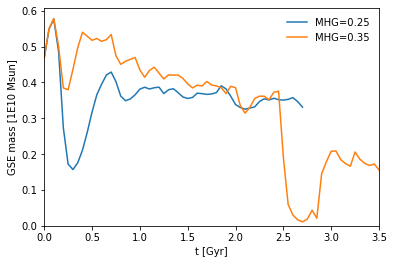

In [55]:
plt.plot(Time, np.array(MassIn10kpc[2])/2, label='MHG=0.25')
plt.plot(Time_035, MassIn10kpc_035[2], label='MHG=0.35')

plt.legend(frameon=False)

plt.xlabel('t [Gyr]')
plt.ylabel('GSE mass [1E10 Msun]')
plt.xlim(0, 3.5)
plt.ylim(0, None)

In [45]:
name = 'MW3_MHG0.35_GSE2-lvl4'
snap = 300
fname = basepath + 'anlys/MC/'+name+'/MC_Prop_'+str(snap).zfill(3)+'.h5'
f = h5.File(fname, mode='r')

(-80.0, 80.0)

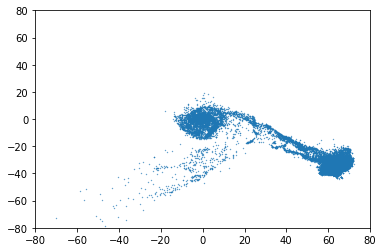

In [46]:
pos = f['PartType5/RotatedCoordinates'][:]
memb  = f['PartType5/Membership'][:]
pos = pos[memb==2]

plt.scatter(pos[:,0], pos[:,1], s=0.1)
plt.xlim(-80, 80)
plt.ylim(-80, 80)